# ¡Hola Vero! 😊

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima iteración. Si en algún punto tienes comentarios, siéntete libre de dejarlos también.


Encontrarás mis comentarios específicos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

A continuación te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**


----

<div class="alert alert-block alert-danger">
<b>Comentario General del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Vero, tu trabajo muestra un buen manejo inicial de los datos, desde la importación y exploración hasta la identificación de patrones relevantes en barrios y compañías de taxis, además de una correcta representación gráfica que da contexto al análisis.

Como sugerencia menor, podrías ajustar la visualización de las empresas para centrarte en las categorías más representativas, lo cual haría la interpretación más clara. 

Por otro lado, es importante que revises la prueba estadística que aplicaste, en este caso no corresponde usar una comparación frente a un valor puntual, sino contrastar dos distribuciones (good vs bad) con `ttest_ind`, idealmente validando antes la homogeneidad de varianzas con la prueba de Levene. Esto permitirá que tus conclusiones sean sólidas y confiables. 

Vas muy bien, con estos ajustes tu análisis tendrá aún más calidad y rigor.

Estaré atento a tu próxima iteración 👀



</div>

<div class="alert alert-block alert-success">
<b>Comentario General del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

¡Vero excelente trabajo con los ajustes! Tu proyecto ahora cumple con todos los objetivos propuestos. Estoy seguro de que lo que aprendiste aquí te será muy útil más adelante. 

¡Éxito en tu próximo sprint! 🚀

*Estado del Proyecto:* **Aprobado**

</div>

-----

### ANÁLISIS COMPAÑIAS DE TAXIS EN CHICAGO

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

df_trips_company = pd.read_csv("/datasets/project_sql_result_01.csv")
df_trips_neighborhood = pd.read_csv("/datasets/project_sql_result_04.csv")

df_trips_company.head()
df_trips_neighborhood.head()


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


#### REVISIÓN DE DATOS Y FILTRACIÓN

In [3]:
df_trips_company.info()
df_trips_company.describe()

df_trips_neighborhood.info()
df_trips_neighborhood.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


Los resultados muestran que no hay datos nulos y es int64 para trips_amount, mientras que para average_trips es float64, lo cual es perfecto para continuar con el análisis de datos.  Ahora bien en el resumen estadístico se muestra que hay 94 barrios registrados. El promedio de viajes en el mes de noviembre fue de 600 viajes por barrio. La desviación estándar al ser muy alta, nos indica la gran desigualdad entre las compañías de taxis. El mínimo de viaje es de 2. y el máximo de viajes en la zona más concurrida fue de 10 727.  Lo cual nos indica que hay zonas estratégicas como turísticas, el aeropuerto, negocios en donde la gente viaja más.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Muy buen trabajo importando las librerías y los datos del proyecto. Adicionalmente usaste correctamente las funciones `info`, `describe` y `head`, esto te permite hacer una primera revisión de los datos, su estructura y contenido.

</div>

#### IDENTIFICACIÓN DE LOS 10 BARRIOS PRINCIPALES 

In [4]:
top_10_neighborhoods = df_trips_neighborhood.sort_values(by="average_trips", ascending=False).head(10)
top_10_neighborhoods


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


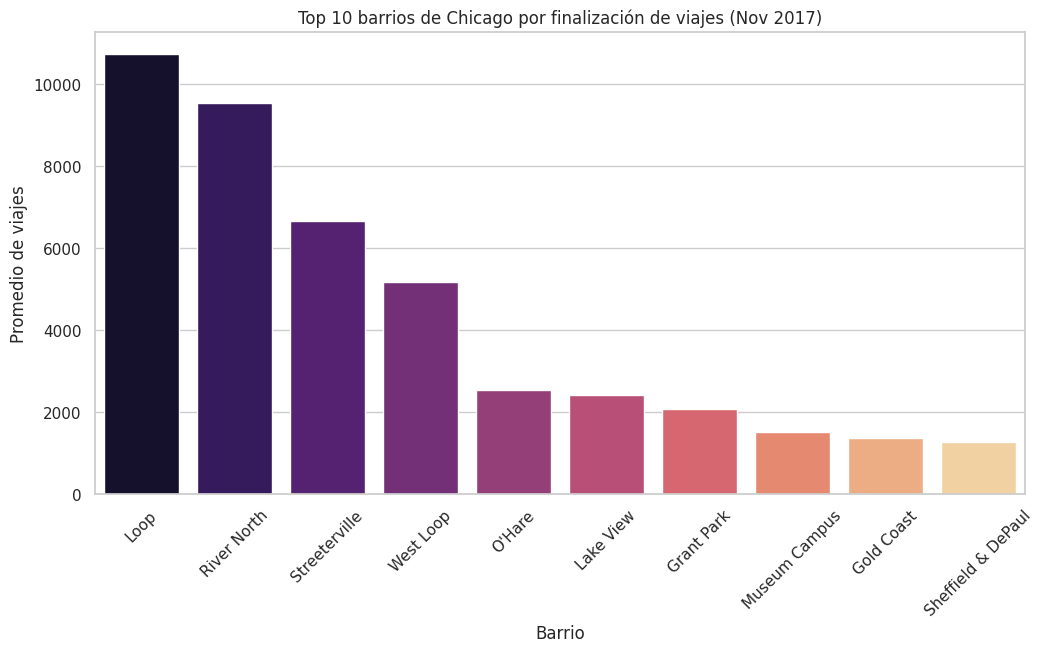

In [7]:
plt.figure(figsize=(12,6))
sns.barplot(data=top_10_neighborhoods, 
            x="dropoff_location_name", y="average_trips", palette="magma")
plt.xticks(rotation=45)
plt.title("Top 10 barrios de Chicago por finalización de viajes (Nov 2017)")
plt.ylabel("Promedio de viajes")
plt.xlabel("Barrio")
plt.show()


###### Conclusión:

En el mes de Noviembre se puede evidenciar que la mayor cantidad de viajes promedio realizados por día fueron a: -Loop con 10 727 viajes debido a q en este sector se encuentra el distrito financiero y de negocios más importante de la ciudad. -Seguido por River North con una demanda alta de 9 523 viajes por día, esto es debido a que es una zona de restaurantes, vida nocturna y hotelera. -Mientras que los de menor afluencia de viajes fue en Museum Campus, Gold Coast y Sheffield & DePaul con menos de 1500 viajes por día, pero no dejan de ser concurridas dado que en estos sectores están áreas turísticas, residencias y instituciones educativas.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Buen trabajo obteniendo el Top de barrios! Lograste identificar y jerarquizar bien los de mayor actividad, destacando la diferencia notable con barrios como Loop y River North, que seguramente destacan por su relevancia comercial y turística.

</div>

## GRÁFICOS

##### Empresas de taxis & número de viajes

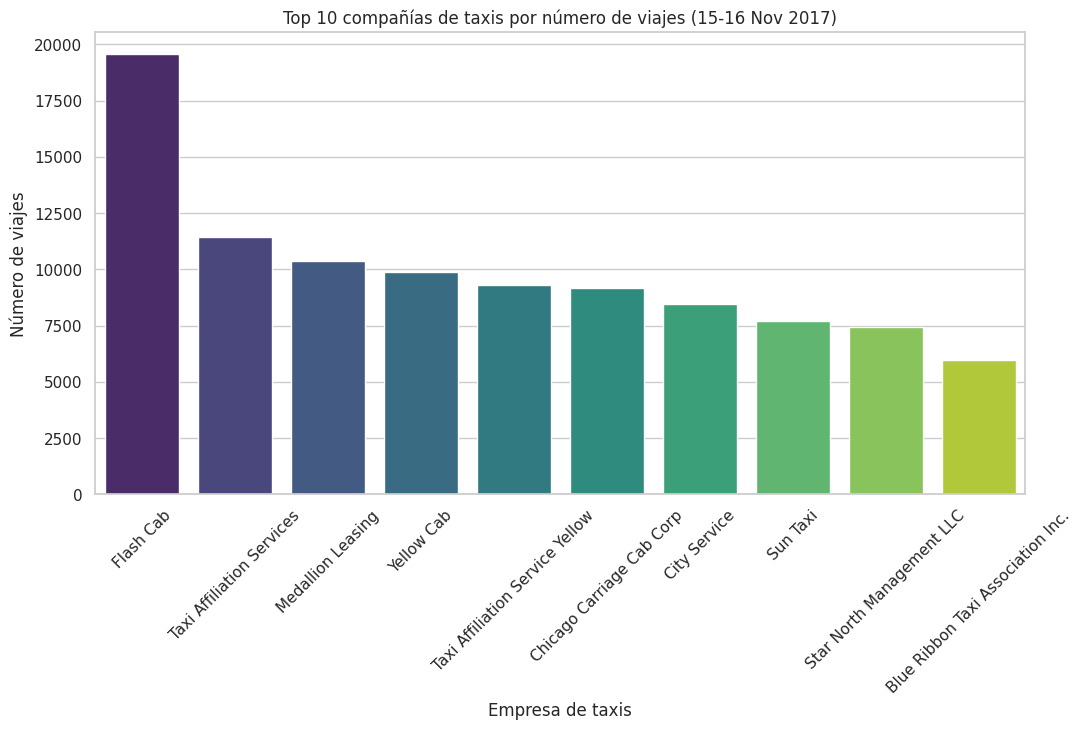

In [5]:

top_10_companies = df_trips_company.sort_values(by="trips_amount", ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_10_companies, x="company_name", y="trips_amount", palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 compañías de taxis por número de viajes (15-16 Nov 2017)")
plt.ylabel("Número de viajes")
plt.xlabel("Empresa de taxis")
plt.show()



###### Conclusión

De las 64 compañias de taxis se evidencia que la mayor concentración del mercado con casi mas de 100%  está en FLASH CAB, siendo la empresa dominante frente a sus competidores, esto puede ser debido  a que tienen mayor cobertura de servicios, flota más amplia o reconocimiento de marca. Mientras que las otras empresas muestran un volumen de viajes reducidos a la mitad. Indicando un mercado muy desigual y altamente concentrado en una sola empresa.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Muy buen trabajo con la gráfica! Se observa que Flash Cab lidera en volumen de viajes, lo que sugiere una fuerte concentración del mercado. Esto puede estar relacionado con su cobertura, cantidad de vehículos o buenas estrategias comerciales.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Como recomendación, puedes configurar la gráfica para solo mostrar un Top de empresas, ya que si te das cuenta más de la mitad de empresas tienen muy pocos datos. Esto le dará claridad a la información y facilitará su interpretación.

</div>
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

Buen trabajo con los ajustes de la gráfica

</div>

### PRUEBA DE HIPÓTESIS

In [6]:
df_loop_ohare = pd.read_csv("/datasets/project_sql_result_07.csv")

df_loop_ohare['start_ts'] = pd.to_datetime(df_loop_ohare['start_ts'])


In [10]:


# Filtrar solo sábados
saturdays = df_loop_ohare[df_loop_ohare['day_of_week'] == 'Saturday']

# Filtrar sábados con clima 'Bad' (equivalente a lluviosos)
rainy_saturdays = saturdays[saturdays['weather_conditions'] == 'Bad']

rainy_saturdays




,start_ts,weather_conditions,duration_seconds,day_of_week
6,2017-11-04 16:00:00,Bad,2969.0,Saturday
30,2017-11-18 12:00:00,Bad,1980.0,Saturday
34,2017-11-04 17:00:00,Bad,2460.0,Saturday
51,2017-11-04 16:00:00,Bad,2760.0,Saturday
52,2017-11-18 12:00:00,Bad,2460.0,Saturday
...,...,...,...,...
1031,2017-11-18 12:00:00,Bad,2560.0,Saturday
1032,2017-11-18 10:00:00,Bad,1908.0,Saturday
1053,2017-11-18 12:00:00,Bad,2400.0,Saturday
1061,2017-11-18 16:00:00,Bad,2186.0,Saturday


#### Planteamiento de hipótesis

Elegí la prueba t de una muestra para poder comparar una media muestral contra la media poblacional.

In [8]:

import pandas as pd
from scipy import stats

# Cargar datos
df_loop_ohare = pd.read_csv("/datasets/project_sql_result_07.csv")
df_loop_ohare['start_ts'] = pd.to_datetime(df_loop_ohare['start_ts'])

# Crear columna 'day_of_week' a partir de 'start_ts'
df_loop_ohare['day_of_week'] = df_loop_ohare['start_ts'].dt.day_name()

# Ahora sí podemos filtrar sábados
saturdays = df_loop_ohare[df_loop_ohare['day_of_week'] == 'Saturday']

# Separar sábados con buen y mal clima
good_saturdays = saturdays[saturdays['weather_conditions'] == 'Good']['duration_seconds']
bad_saturdays = saturdays[saturdays['weather_conditions'] == 'Bad']['duration_seconds']

# Verificar que los datos existen
print("Cantidad sábados buen clima:", len(good_saturdays))
print("Cantidad sábados mal clima:", len(bad_saturdays))



Cantidad sábados buen clima: 888
Cantidad sábados mal clima: 180


In [9]:



levene_stat, levene_p = stats.levene(good_saturdays, bad_saturdays)
print("Levene test p-value:", levene_p)

# Definir equal_var según resultado de Levene
equal_var_flag = True if levene_p > 0.05 else False
print("Usar equal_var =", equal_var_flag)


Levene test p-value: 0.5332038671974493
Usar equal_var = True


In [10]:
t_stat, p_value = stats.ttest_ind(bad_saturdays, good_saturdays, equal_var=equal_var_flag)

print("t-statistic:", t_stat)
print("p-value:", p_value)

# Decisión
alpha = 0.05
if p_value < alpha:
    print("Rechazamos H0: la duración promedio cambia entre sábados con buen y mal clima")
else:
    print("No rechazamos H0: no hay evidencia de cambio en la duración promedio")


t-statistic: 6.946177714041499
p-value: 6.517970327099473e-12
Rechazamos H0: la duración promedio cambia entre sábados con buen y mal clima


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Ten en cuenta que el método `ttest_1samp` se usa cuando queremos comparar una distribución respecto a un valor puntual, pero en este caso tienes información suficiente para hacer una comparación entre dos distribuciones, los datos respecto a los días con buen clima vs los días con mal clima, por lo tanto, debes usar la función `ttest_ind` que sirve cuando queremos comparar la media de dos distribuciones.

También te recomiendo realizar previamente una prueba de [Levene](https://www.educaopen.com/digital-lab/blog/educacion-digital/prueba-de-levene) para evaluar la igualdad de las varianzas, lo que te permitirá configurar adecuadamente el parámetro **equal_var** en la función `ttest_ind`. Esto te brindará una interpretación más precisa de los resultados además garantizará que la *prueba t* sea estadísticamente válida.


</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

¡Excelente Vero! Aplicaste correctamente la prueba de hipótesis comparando la distribución de muestras independientes comprobando que el clima sí afecta la duración de los viajes en Taxi. Además incluiste la prueba de Levene, lo cual es clave para verificar la similitud de las varianzas y garantizar que la prueba t sea estadísticamente válida. 

</div>

### CONCLUSIONES 

El p-value es mucho menor que α = 0.05, rechazamos la hipótesis nula (H0). Eexiste evidencia estadística fuerte de que la duración promedio de los viajes difiere entre sábados con buen y mal clima.

La hipótesis alternativa (H1) queda respaldada: los sábados con clima adverso (lluviosos) generan viajes más largos.  

Esto significa que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O’Hare sí cambia en sábados lluviosos.

En otras palabras, los viajes tienden a ser más largos cuando hay clima adverso, probablemente debido a tráfico más lento, precauciones de conducción y condiciones climáticas que afectan la velocidad.

La hipótesis alternativa (H1) queda respaldada por los datos: el clima adverso los sábados tiene un efecto significativo en la duración de los viajes.

## CONCLUSION GENERAL

ANÁLISIS PARA LAS COMPAÑIAS DE TAXIS

- De las 64 compañías, se observa que FLASH CAB concentra la mayor parte de los viajes realizados el 15 y 16 de noviembre de 2017.

- Esto indica un mercado altamente concentrado, donde unas pocas empresas dominan la mayoría de los viajes, mientras que la mayoría tiene participación marginal.

- Probablemente, las empresas con mayor número de viajes cuentan con flotas más grandes, mejor cobertura de servicio y reconocimiento de marca, lo que les da ventaja sobre las pequeñas compañías.


ANÁLISIS DE LOS BARRIOS DE CHICAGO

- Del análisis de los 94 barrios, los 10 principales concentran la mayor parte de las finalizaciones de viaje en noviembre de 2017.

- Esto sugiere que la demanda de taxis no está distribuida uniformemente en la ciudad; los viajes tienden a terminar en zonas con alta actividad comercial, turística o de transporte, mientras que otros barrios presentan muy poca actividad.

- La distribución de viajes por barrio es altamente desigual, lo que puede ser útil para las empresas al planificar cobertura o estrategias de asignación de vehículos.

HIPÓTESIS

Evalué si la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O’Hare cambia los sábados con clima adverso (Bad).

- La prueba t de una muestra arrojó:

        t-statistic: 6.946177714041499
        p-value: 6.517970327099473e-12

Dado que el p-value es mucho menor que el nivel de significación α = 0.05, rechazamos la hipótesis nula.

Esto indica que la duración promedio de los viajes sí aumenta en sábados lluviosos, probablemente debido a tráfico más lento, precauciones de conducción y condiciones climáticas adversas.


<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

Vero has logrado articular un análisis riguroso que combina estadística inferencial con una lectura contextual de los datos, lo que enriquece la interpretación de los resultados, buen trabajo.

</div>